# FBB you should remove my instruction cells: this should be your notebook, with your description of the exercise as a header, and your code and description of the code, and plots, and explaining why you do what you do

# FBB you MUST  decribe with captions ALL your figure to show that you are understanding what you are doing. 

# Your conclusions about the ethinicity are not complete .

# dont let your lines of code go past the length of the cell

# The coding parts are ok but watch PEP8 compliance
.
# there are lots of outputs without explenations (largely because there are a lot of cells that were not changed from my instructions). There should be NONE: all outputs should be discussed

# look for cells of code with FBB in them for further comments

## GENDER INCOME GAP

you may know that it is estimated that women earn about 78% of men in the same job position. 
Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer to a woman job candidate, given what I would offer a man for the same job?)




In [4]:
from __future__ import print_function, division
import sys
import os
import numpy 
import pylab as pl
import pandas as pd

#import json
import os
#s = json.load( open(os.getenv('PUI2016')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)


%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
import seaborn
import matplotlib

In [6]:
from scipy import stats

In [7]:
#The gender gap(non mandatory viewing)
from IPython.display import YouTubeVideo
YouTubeVideo("G_ikzQM93W8")

the Census data on income
http://www.census.gov/hhes/www/cpstables/032015/perinc/pinc03_000.htm

I posted the relevant data on the class webpage here : http://cosmo.nyu.edu/~fb55/PUI2016/data

# 1. Create two python dictionaries to store your data. 
```
     allmales = ... 
```
stores the male data
```
    allfemales = ...
```
stores the female data
     
each dictionary needs to have 5 key-pair values with keys:
'all', 'white', 'black', 'hispanic', 'asian'
each value should contain a dataframe read with the pandas read_excel function directly from the url. 

should contain



In [8]:
allmales = {}
allfemales = {}

suffix = ".xls"
male = ("2", 'male')
female = ("3", 'female')
All = ("_1_1", 'all')
white = ("_1_4", 'white')
black = ("_1_6", 'black')
asian = ("_1_8", 'asian')
hispanic = ("_1_9", 'hispanic')
genders = [male, female]
races = [All, white, black, hispanic, asian]

In [9]:
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_"
for gender in genders:
    for race in races:
        file_url = url + gender[0] + race[0] + suffix
        df_temp = pd.read_excel(file_url, skiprows=9, skip_footer=1)
        if gender[1] == 'male':
            allmales[race[1]] = df_temp
        elif gender[1] == 'female':
            allfemales[race[1]] = df_temp

# the file name root is "pinc_" (common to all files)
## 08_2  are male, 
## 08_3 are female, 
### _1_1 is all ethnicities
### _1_4 is white
### _1_6 is black
### _1_8 is asian
### _1_9 is hispanic
# extension is .xls for all files
put together the link name from this info and load the data on your allmales and allfemales dictionaries

use 1 header row (figure out which one by looking at the output of my 
allfemales['all'].head() and .columns a couple of cells below)

In [10]:
#allfemales and allmales should be dictionaries
type(allfemales)

dict

In [11]:
allfemales['all'].head(3)

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,109956,7590,4298,5557,7874,8052,5720,6768,4377,...,167,285,184,4442,22063,137,31968,250,0.495,0.0025
2,Earnings,74545,4198,3118,3269,2662,4579,1994,4134,2585,...,60,236,127,3535,27736,364,36189,307,0.466,0.0032


In [12]:
# the files are a bit of a mess! 
allfemales['all'].columns

Index(['Characteristic', 'Total with Income', '$1 to $2,499 or loss',
       '$2,500 to $4,999', '$5,000 to $7,499', '$7,500 to $9,999',
       '$10,000 to $12,499', '$12,500 to $14,999', '$15,000 to $17,499',
       '$17,500 to $19,999', '$20,000 to $22,499', '$22,500 to $24,999',
       '$25,000 to $27,499', '$27,500 to $29,999', '$30,000 to $32,499',
       '$32,500 to $34,999', '$35,000 to $37,499', '$37,500 to $39,999',
       '$40,000 to $42,499', '$42,500 to $44,999', '$45,000 to $47,499',
       '$47,500 to $49,999', '$50,000 to $52,499', '$52,500 to $54,999',
       '$55,000 to $57,499', '$57,500 to $59,999', '$60,000 to $62,499',
       '$62,500 to $64,999', '$65,000 to $67,499', '$67,500 to $69,999',
       '$70,000 to $72,499', '$72,500 to $74,999', '$75,000 to $77,499',
       '$77,500 to $79,999', '$80,000 to $82,499', '$82,500 to $84,999',
       '$85,000 to $87,499', '$87,500 to $89,999', '$90,000 to $92,499',
       '$92,500 to $94,999', '$95,000 to $97,499', '$97,500 

# Descriptive phase: 


### Numbers in thousands

In [13]:
# just run this cell to get an idea of the data
for k,v in allfemales.items():
    print("#####", k)
    print(v.describe())
for k,v in allmales.items():
    print("#####", k)
    print(v.describe())

##### black
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean         2120.260870            292.304348        141.021739   
std          3673.947011            563.958859        181.001595   
min             0.000000              0.000000          0.000000   
25%            97.500000             11.500000         11.250000   
50%           511.500000            105.000000         64.500000   
75%          2821.500000            351.500000        185.000000   
max         14346.000000           2727.000000        679.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         140.934783        229.456522          179.021739   
std          203.026917        371.274843          321.057730   
min            0.000000          0.000000            0.000000   
25%            4.500000          6.250000         

# 2. Exploratory phase
## at this point it is a good idea to see if we can plot some data.
## pandas has a nifty function scatter_matrix which plots every numerical column against the other. 
## however there are a lot of non-real values in these DataFrames so running pd.scatter_matrix(allmales['asian']) for example would fail. You can try!

In [14]:
pd.scatter_matrix?

In [15]:
allmales['all'][[u'Total with Income',u'$2,500 to $4,999',u'Median income',u'Gini ratio']].head(3)

,Total with Income,"$2,500 to $4,999",Median income,Gini ratio
0,NaN,NaN,Value\n(Dol.),Ratio
1,108706,2665,35228,0.501
2,83555,2326,39903,0.489


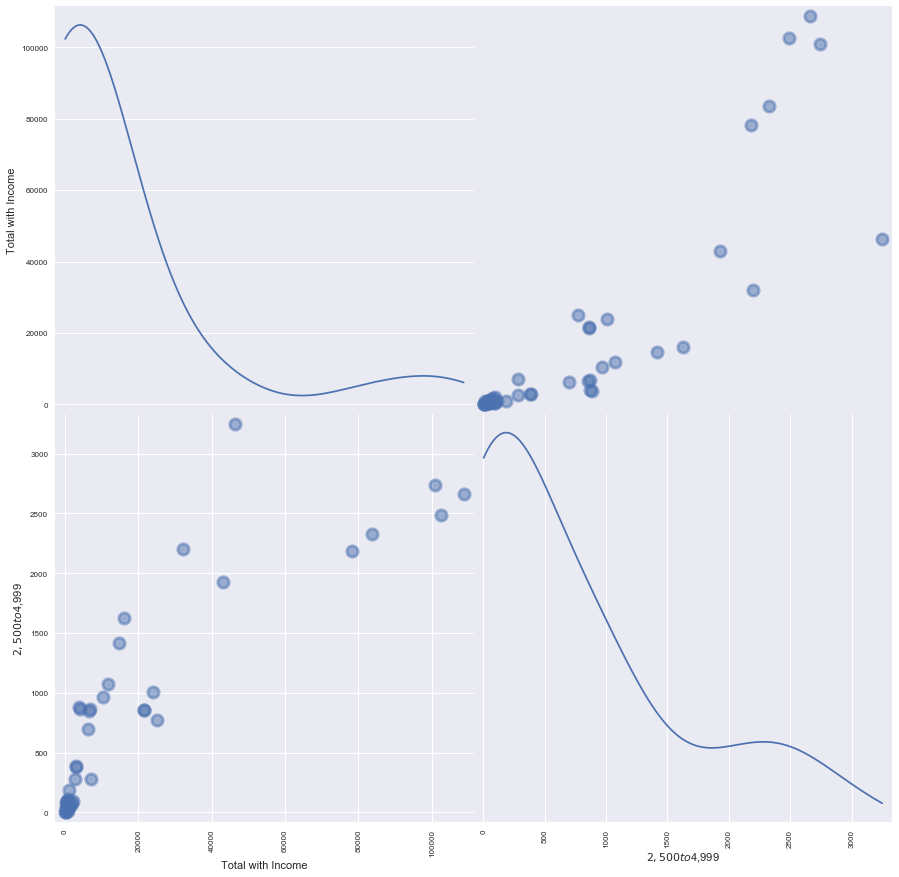

In [16]:
# only columns containing real numerical values 
# are plotted with scatter_matrix. 
# But we are interested in median income but it wont get plotted, 
# due to bad values in the column

fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')                

In [17]:
# FBB missing figure caption. 

In [18]:
#the rel values in the Median income row are fewer than the number of rows
print (allmales['asian'].shape)
allmales['asian'].applymap(np.isreal).sum()

(48, 49)


Characteristic           1
Total with Income       48
$1 to $2,499 or loss    48
$2,500 to $4,999        48
$5,000 to $7,499        48
$7,500 to $9,999        48
$10,000 to $12,499      48
$12,500 to $14,999      48
$15,000 to $17,499      48
$17,500 to $19,999      48
$20,000 to $22,499      48
$22,500 to $24,999      48
$25,000 to $27,499      48
$27,500 to $29,999      48
$30,000 to $32,499      48
$32,500 to $34,999      48
$35,000 to $37,499      48
$37,500 to $39,999      48
$40,000 to $42,499      48
$42,500 to $44,999      48
$45,000 to $47,499      48
$47,500 to $49,999      48
$50,000 to $52,499      48
$52,500 to $54,999      48
$55,000 to $57,499      48
$57,500 to $59,999      48
$60,000 to $62,499      48
$62,500 to $64,999      48
$65,000 to $67,499      48
$67,500 to $69,999      48
$70,000 to $72,499      48
$72,500 to $74,999      48
$75,000 to $77,499      48
$77,500 to $79,999      48
$80,000 to $82,499      48
$82,500 to $84,999      48
$85,000 to $87,499      48
$

In [19]:
# there are a lot of non-real values that make the analysis hard.
# the ugly loops below will help you clean up 
# CHALLENGE: can you do better and to it in a more pythonic way 
#            without using loops? 
#NOTE: this only will work if the data is store how I suggested. 
# you are welcome to find your own solution though.

for gender in [allmales, allfemales]:
    for k in gender:
        # find non real values in the dataframe with applymap
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            #i f some but not all values in column are real, replace the non real ones
            if isreal.sum()[c] > 0 and isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# now you can plot the dataframe values with a scatter plot 
 just like I tried to do above
 please plot is and write a DESCRIPTIVE caption for the plot in a cell below it

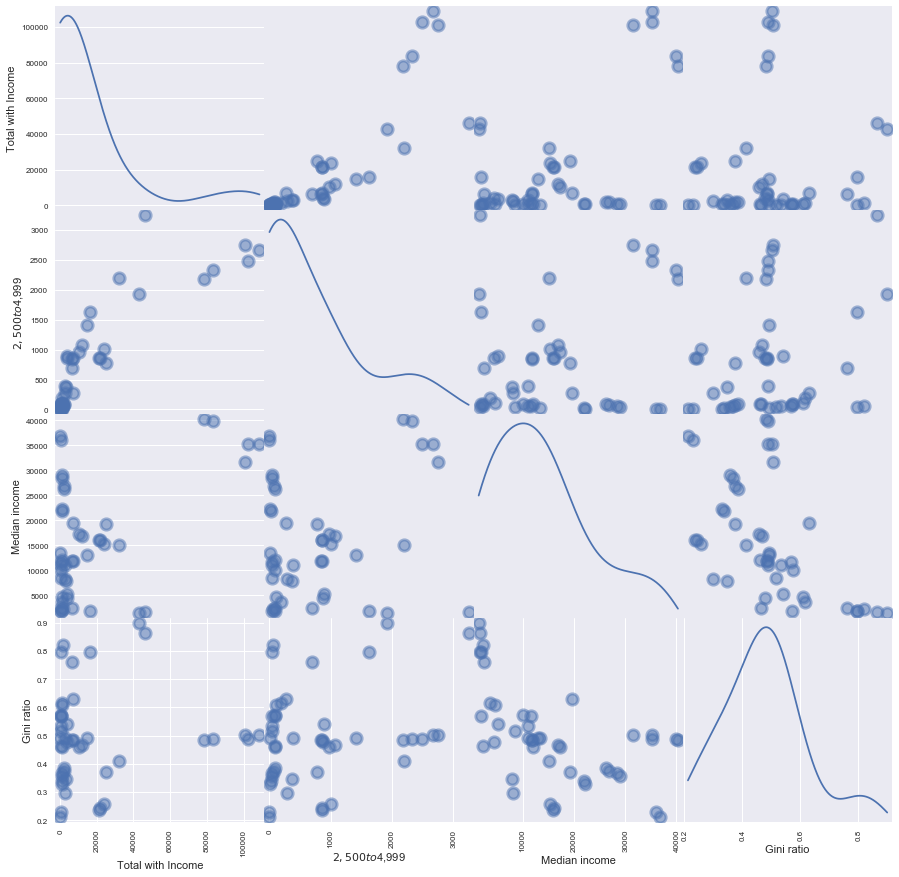

In [20]:
# use scatter_matrix to make this plot...
fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')                

####  correlation between 'Total with Income', '\$2,500 to \$4,999', 'Median income', 'Gini ratio' in "Male" group

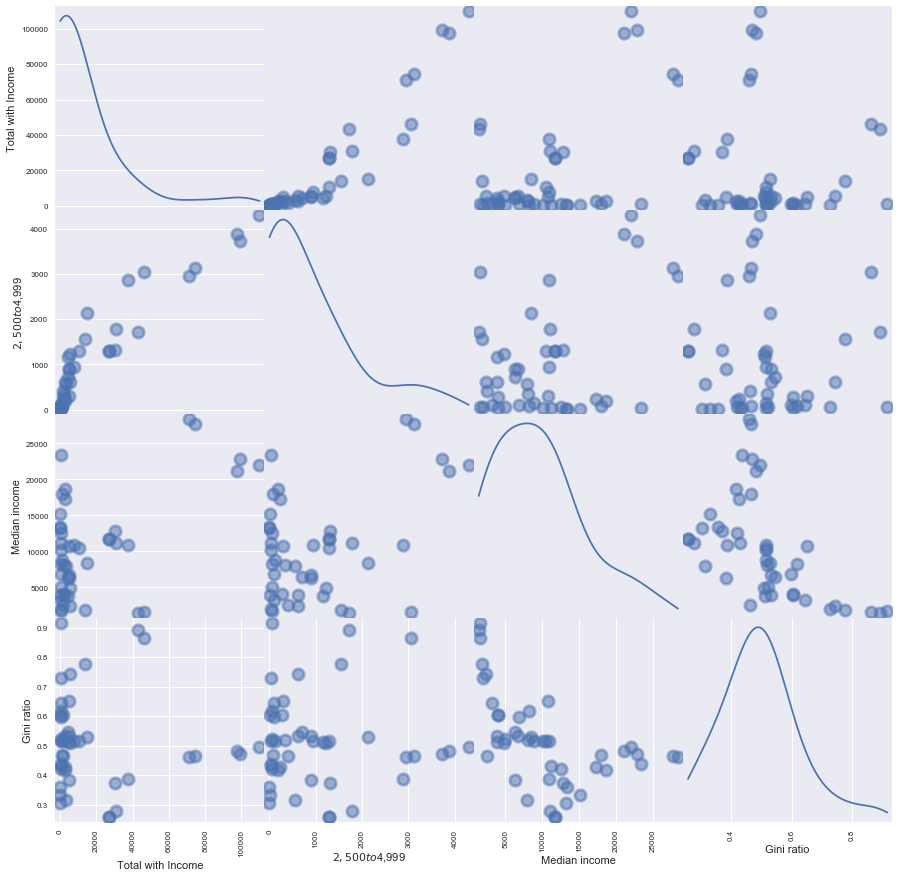

In [21]:
# do the same for all female
fig = pd.scatter_matrix(allfemales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')                

####  correlation between 'Total with Income', '\$2,500 to \$4,999', 'Median income', 'Gini ratio' in "Female" group

## 3. to see how the male and female income relate to each other plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males, race by race (one data point per race)

## also plot the 1-1 line: the diagonal that corresponds to men and women getting the same pay

(make the plot and describe it in a "caption" in the cell below the plot)

In [22]:
#Ues function pl.cm.datad.keys() to show all the color maps in pylab. 
#cmap = pl.get_cmap( 'Spectral' )
#colors = [ cmap(i) for i in xrange(5)]
#shuffle(colors)

In [23]:
male_median = []
female_median = []
for race in races:
    male_median.append(allmales[race[1]]['Median income'][1])
    female_median.append(allfemales[race[1]]['Median income'][1])

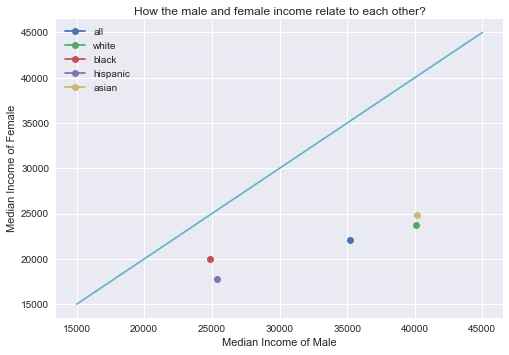

In [26]:
# CODE FAILS HERE

for i in range(5):
    pl.plot(male_median[i], female_median[i], marker = 'o', label=races[i][1])

pl.legend(loc="best")
pl.title("How the male and female income relate to each other?")
pl.xlabel("Median Income of Male")
pl.ylabel("Median Income of Female")
#pl.xlim(17000,42000)
#pl.plot(17000,30000)
pl.plot([15000,45000], [15000,45000])

#### The plot shows different points which representes median income of each race (x, y) = (male, female).
#### The line is y=x which indicates any point (race) under the line has the income inequality by gender. 

# FBB OK. If you want to show inequality here use a squared plot, so the 45degree line can easily identified as the equality line and slopes intuitively compared to it.

# 4. Now fit the data with a line.
### you can use statsmodels, or scipy, numpy, or create your own residual minimization function. 
### Below are steps on how to do this with numpy. Statsmodels requires fewer steps, and you are welcome to use that package. Numpy is less of a black box, so you would learn more taking yourself through the exercise. but you will be graded on the succesful fit, however you choose to perform it.

Steps to use numpy (and you do not have to!) you can for example use 

pl.plot(newx, np.poly1d(np.ployfit(x, y, 1))(newx)

to make and plot the fit in one line (although this way you did not save the parameters so you need to rerun the function to get the slope and intercept ... :-/

why not challenge yourself (if you want) and  create your own residual minimization function you can minimize it with scipy instead of a nested for loop (which is called 'brute force minimization')!

from scipy.optimize import minimize

def line ().....
    #this would be a function that creates a line given parameters, 
    #like we did in class
    ...
    return y

def residuals(data, model, error=None):
    #you can add errors if you want
    you want to return the sum of the residuals 
    #(difference b/w data and model **2)
    return residuals

You need an initial guess for the parameters, where you start searching. It has to be a single variable, so for 2 parameters (a and b for a line) you need to make make a list (or array or tuple) of 2 elements. The numbers inside do not have to be 0 and 1 like I have below - but choose something not too crazy or your minimization will get lost!

p0 = [0,1] 

then run: 

result = minimize(residuals, p0, args=(all_males, all_females))

in args I put all arguments of the function residuals that are not to be evaluated for the minimization (in this case the data)

In [27]:
# FBB move imports to top cell
from sklearn import linear_model

In [28]:

# FBB dont leave output witout explaination!


reg0 = linear_model.LinearRegression(fit_intercept=False)
reg0.fit(np.array(male_median).reshape(5,1), np.array(female_median).reshape(5,1))
print (reg0.coef_, reg0.intercept_)

[[ 0.64232166]] 0.0


In [31]:
reg = linear_model.LinearRegression()
reg.fit(np.array(male_median).reshape(5,1), np.array(female_median).reshape(5,1))
print (reg.coef_, reg.intercept_)

[[ 0.35314068]] [ 9989.84440839]


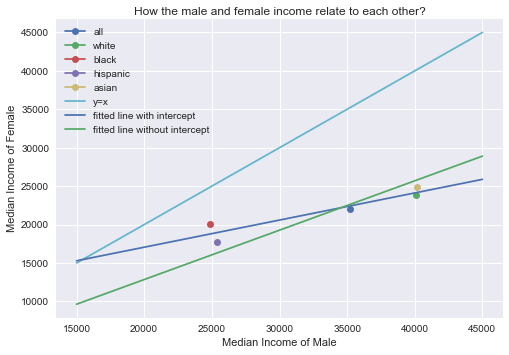

In [32]:

# FBB dont let lines of code go past the cell!

for i in range(5):
    pl.plot(male_median[i], female_median[i], marker = 'o', label=races[i][1])
pl.legend(loc="best")
pl.title("How the male and female income relate to each other?")
pl.xlabel("Median Income of Male")
pl.ylabel("Median Income of Female")
#pl.xlim(17000,42000)
#pl.plot(17000,30000)
pl.plot([15000,45000], [15000,45000],label='y=x')
#pl.plot(np.array(male_median).reshape(5,1), reg.predict(np.array(male_median).reshape(5,1)))
pl.plot(np.array([15000,45000]).reshape(2,1), reg.predict(np.array([15000,45000]).reshape(2,1)), 
        label="fitted line with intercept")
pl.plot(np.array([15000,45000]).reshape(2,1), reg0.predict(np.array([15000,45000]).reshape(2,1)), 
        label="fitted line without intercept")
pl.legend(loc="best")

# FBB missing figure caption

## there is an analytical solution for the OLS (ordinary least square) regression which is coded below. please try to read the code and understand the formula! 


In [33]:
#this is the analytical best regression line. 
# it can be proved (ask me about it if you want!)
# run the cell below to get the beta0 and beta1 values
from scipy import stats
all_males=np.array([0., allmales['all']['Median income'][1],
                    allmales['white']['Median income'][1],
                    allmales['black']['Median income'][1],
                     allmales['hispanic']['Median income'][1],
                    allmales['asian']['Median income'][1]])

all_females=np.array([0.] + [allfemales[k]['Median income'][1] \
                             for k in ['all', 'white', 'black',
                                     'hispanic','asian']])
cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()
beta0, beta1

(2224.3609760454674, 0.57394829035421091)

## remake the scatter plot, with your line fit as well as the analytical solution to compare that with the result of your numerical one (remember: a line is y = beta0 + beta1 * x)

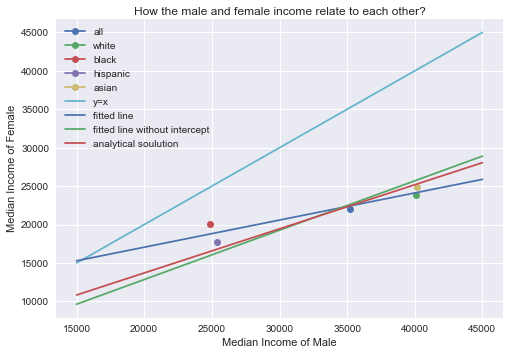

In [35]:
#...
for i in range(5):
    pl.plot(male_median[i], female_median[i], marker = 'o', label=races[i][1])
pl.legend(loc="best")
pl.title("How the male and female income relate to each other?")
pl.xlabel("Median Income of Male")
pl.ylabel("Median Income of Female")
#pl.xlim(17000,42000)
#pl.plot(17000,30000)
pl.plot([15000,45000], [15000,45000],label='y=x')
#pl.plot(np.array(male_median).reshape(5,1), reg.predict(np.array(male_median).reshape(5,1)))
pl.plot(np.array([15000,45000]).reshape(2,1), reg.predict(np.array([15000,45000]).reshape(2,1)), 
        label="fitted line")
pl.plot(np.array([15000,45000]).reshape(2,1), reg0.predict(np.array([15000,45000]).reshape(2,1)), 
        label="fitted line without intercept")
pl.plot(np.array([15000,45000]), beta0+beta1*np.array([15000,45000]), label="analytical soulution" )
pl.legend(loc="best")

# FBB this should have been discussed in the (missing) figure caption


### Note:
#### Actually, my fitted line only consider 5 data points and the analytical soulution include (0, 0) when processing, which is why those both lines looks different. If sklearn model consider the origin (0,0) as well, they will get the same result. 

# 5. this was done with THE TOTAL MEDIAN INCOME, let's now see if all forms of income lead to a different fit. 

We only did this for the Total Median Income, but the file contained income from many sources, which were stored in the Characteristics column.
Use one data point for each source of income (each Characteristics) choosing the 'Median income' for that source and fit a line to those data. The line fit should similar then the previous fit if the Total median income was representative for all forms of income included in this analysis.

To unravel the data and concatenate them back together in a single array is a little complex; 
here are a few lines of code that should do the trick ( this is just what I came up with. If you have something better please share!!)

I used np.concatenate to put together arrays (it takes a list of arrays) and np.flatten to make the array 1 dimensional after merging. I also want to maske the nan values (many functions do not deal well with them). I do that "broadcasting":  using an array of Bools indeces to select the non nan values. Where the array of Bools is True the value is selected, where it is False it is not: e.g.

In [134]: a = np.arange(5)

In [135]: abol = a>2

In [136]: abol
Out[136]: array([False, False, False,  True,  True], dtype=bool)

In [137]: a[abol]
Out[137]: array([3, 4])

In [36]:
#flatten()

In [37]:
allmales['all']['Median income'][:].head(3)

0      NaN
1    35228
2    39903
Name: Median income, dtype: float64

In [38]:
allmales['all']['Median income'][:].shape

(48,)

In [39]:
int(117%48)

21

In [40]:
np.concatenate([allmales['all']['Median income'][:].values, np.array([3,4,5])]).flatten()

array([             nan,   3.52280000e+04,   3.99030000e+04,
         4.02980000e+04,   1.95570000e+04,   2.35900000e+03,
         1.59740000e+04,   8.23200000e+03,   1.82900000e+03,
         1.10100000e+04,   1.01020000e+04,   1.19880000e+04,
         4.44600000e+03,   4.69600000e+03,   1.68700000e+03,
         1.44400000e+03,   1.91000000e+03,   2.45500000e+03,
         1.69390000e+04,   1.18960000e+04,   2.84290000e+04,
         2.19420000e+04,   2.63200000e+04,   3.60690000e+04,
         8.44100000e+03,   1.16730000e+04,   1.11480000e+04,
         1.72090000e+04,   1.17950000e+04,   2.90030000e+04,
         2.22290000e+04,   2.68350000e+04,   3.68400000e+04,
         1.34680000e+04,              nan,   2.37600000e+03,
         5.16900000e+03,   3.67300000e+03,   1.76800000e+03,
                    nan,   3.15920000e+04,   3.52830000e+04,
         1.60400000e+04,   1.93250000e+04,   1.50920000e+04,
         7.84500000e+03,   1.53180000e+04,   1.30980000e+04,
         3.00000000e+00,

In [41]:
all_males_allincomes = np.array(
    np.concatenate([allmales['all']['Median income'][:].values,
                    allmales['white']['Median income'][:].values,
                    allmales['black']['Median income'][:].values,
                    allmales['hispanic']['Median income'][:].values,
                    allmales['asian']['Median income'][:].values]).flatten())
#with a list comprehension syntax, but the result i the same as above
all_females_allincomes = np.array(
    np.concatenate([allfemales[k[1]]['Median income'][:].values for k in races]).flatten())

#IDepending on what you use to fit you may need to remove NaN values 
#I am gonna create the mask in the next line. 
#the mask is False where either male or female value is NaN. 
#Notice that True is really just >1, and False really 0. 
#so i can add the male and female mask and the resulting mask will be 
#False where both arrays are not Nan, and true otherwise. 

mask = ~(np.isnan(all_males_allincomes) + np.isnan(all_females_allincomes))
# now you can use mask as an index (broadcasting) to select the non NaN values

In [42]:
df3 = pd.concat([pd.DataFrame(all_females_allincomes),pd.DataFrame(all_males_allincomes)],axis=1)

In [43]:
df3.columns=['female','male']

In [44]:
df4 = df3.dropna(how='any',axis=0)

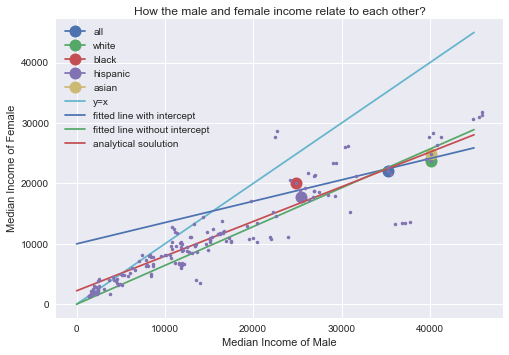

In [46]:


# FBB dont let lines of code go past the cell!


for i in range(5):
    pl.plot(male_median[i], female_median[i], marker = 'o', label=races[i][1], markersize=12)
#pl.legend(loc="best")
pl.title("How the male and female income relate to each other?")
pl.xlabel("Median Income of Male")
pl.ylabel("Median Income of Female")
#pl.xlim(17000,42000)
#pl.plot(17000,30000)
pl.plot([0,45000], [0,45000],label='y=x')
#pl.plot(np.array(male_median).reshape(5,1), reg.predict(np.array(male_median).reshape(5,1)))
pl.plot(np.array([0,45000]).reshape(2,1), reg.predict(np.array([0,45000]).reshape(2,1)), 
        label="fitted line with intercept")
pl.plot(np.array([0,45000]).reshape(2,1), reg0.predict(np.array([0,45000]).reshape(2,1)), 
        label="fitted line without intercept")
pl.plot(np.array([0,45000]), beta0+beta1*np.array([0,45000]), label="analytical soulution" )
pl.plot(df4.male,df4.female,'.', label="")
pl.legend(loc="best")

#### Here's the plot including different kinds of fitted lines and a bunch of data points which representes the median income of all catergories (male by female).
<br/>
#### Both fitted lines (sklearn model and analytical solution (by prof) seems like fitting well in all cases.
<br/>
#### There're some points (like meaningful "outliers")  highly influence the parameters'value of fitted lines, like 'Federal Government Retirement' of 'black people' (the index is 116).

# FBB please be formal in your wording in the captions. This is a presentations! do not use words like "bunch", "like" etc. I cannot see the index so the info on outlier you give is meaningless. Indicate the outliers by their x-y value on the plot so the reader can see them.

In [47]:
df4[(df4.male<df4.female)][df4.male>20000]

//anaconda/lib/python3.5/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


,female,male
116,27664,22479
125,28727,22722


# 6. PREDICTION


## Now pick a stipend (maybe your ideal stipend).
## and predict what a woman in a position where a man recieves your ideal stipend would make



<br/>
#### Mainly concentrate on 'Educational Assistance'

In [48]:

# FBB dont leave output without explaination 
 

ind = np.arange(36,df3.shape[0], 48)
ind

array([ 36,  84, 132, 180, 228])

In [49]:
df5 = df3.iloc[ind,:]
df5

,female,male
36,4878,5169
84,4885,5336
132,5065,4987
180,4198,4524
228,5196,6069


####  I use  the fitted line form sklearn model without intercept

In [50]:
df5.male.shape

(5,)

In [51]:
df5['pred']=reg0.predict(np.array(df5.male).reshape(5,1))
df5

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,female,male,pred
36,4878,5169,3320.160682
84,4885,5336,3427.428400
132,5065,4987,3203.258139
180,4198,4524,2905.863209
228,5196,6069,3898.250180


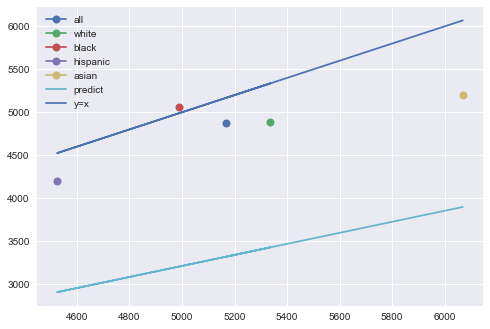

In [53]:
for i in range(5):
    pl.plot(df5.iloc[i,1], df5.iloc[i,0], marker = 'o', label=races[i][1], markersize=8)
    #pl.plot([df5.iloc[i,1], df5.iloc[i,1]], [df5.iloc[i,0],df5.iloc[1,2]],)
pl.plot(df5.iloc[:,1], df5.iloc[:,2], label='predict')
pl.plot(df5.iloc[:,1],df5.iloc[:,1],label='y=x')
pl.legend(loc='best')
#pl.plot(df5.male, df5.female, 'x')


####  Each point represente the true edu assistance by races, and the line contains the predicted edu assistance by sklearn model without intercept (we trained be before only use the total median income)

# FBB  please use complete sentences and words

# THis is not what I asked: I asked for a given male stipend what would be the corresponding female stipend according to your model. 

# 7. lastly do you have any comments about what these data tell us about race? 
how you would go about analyzing race differences with these data? (just a few sentences)

#### In terms of Educational Assistance, the inequality problem by genders seems much less obvious than the inequality total income by genders. Maybe, Gov or Private company realize that education is important for all genders in earier time.
#### When it comes to races, we might conclude that education assistance for black is much higher than any other race, even exceed edu assistance for black man. Beside, asian community should pay more attention to education assistance for women.  

# FBB the covariance of race and income invalidates the analysis